In [114]:
import cv2
from scipy.fftpack import *
import numpy as np
import math
from skimage.util import random_noise
from google.colab.patches import cv2_imshow


Enter 1 for color image background
 Enter 2 for gray-scale Background
2
Enter 1 for color image watermark
 Enter 2 for gray-scale watermark
2
Original Image


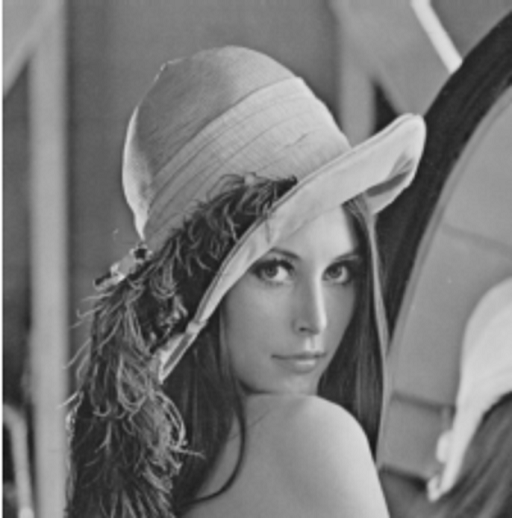

Watermark image


In [115]:
a=int(input("Enter 1 for color image background\n Enter 2 for gray-scale Background\n"))
if a==1:
  image_path="cover.jpg"
else:
  image_path="lena.png"
b=int(input("Enter 1 for color image watermark\n Enter 2 for gray-scale watermark\n"))
if b==1: 
  watermark_path="iitbbs_logo.jpeg"
else:
  watermark_path="logo.png"
img_original=cv2.imread(image_path)
img_watermark=cv2.imread(watermark_path)
print("Original Image")
cv2_imshow(img_original)
print("Watermark image")
cv2_imshow(img_watermark)

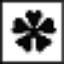

In [116]:

img=cv2.imread(watermark_path)
img=cv2.resize(img,(64,64))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image_array=np.array(img,dtype=float).reshape((64, 64))
cv2_imshow(img)
watermark,watermark_array= img,image_array


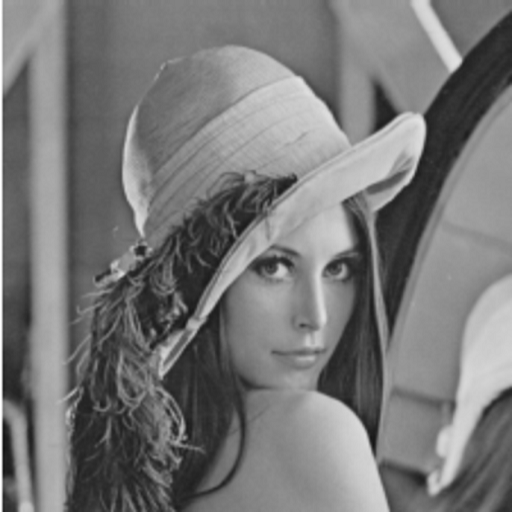

In [117]:
img=cv2.imread(image_path)
img=cv2.resize(img,(512,512))
image_array=np.array(img,dtype=float).reshape((512, 512,3))
cv2_imshow(img)
ori_image,ori_array=img,image_array

In [118]:
def DCT(image_array):
    size = len(image_array[0])
    result = np.empty((size, size)) #empty array
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subpixels = image_array[i:i+8, j:j+8]
            subdct = dct(dct(subpixels.T, norm="ortho").T, norm="ortho")
            result[i:i+8, j:j+8] = subdct
    return result

In [119]:
watermark_array

array([[ 9., 12., 24., ..., 39., 40., 41.],
       [12., 16., 34., ..., 49., 45., 44.],
       [24., 34., 81., ..., 96., 63., 56.],
       ...,
       [24., 34., 81., ..., 96., 63., 56.],
       [12., 16., 34., ..., 49., 45., 44.],
       [ 9., 12., 24., ..., 39., 40., 41.]])

In [120]:
watermark_array=watermark_array/255
b=DCT(ori_array[:,:,0])
watermark_array

array([[0.03529412, 0.04705882, 0.09411765, ..., 0.15294118, 0.15686275,
        0.16078431],
       [0.04705882, 0.0627451 , 0.13333333, ..., 0.19215686, 0.17647059,
        0.17254902],
       [0.09411765, 0.13333333, 0.31764706, ..., 0.37647059, 0.24705882,
        0.21960784],
       ...,
       [0.09411765, 0.13333333, 0.31764706, ..., 0.37647059, 0.24705882,
        0.21960784],
       [0.04705882, 0.0627451 , 0.13333333, ..., 0.19215686, 0.17647059,
        0.17254902],
       [0.03529412, 0.04705882, 0.09411765, ..., 0.15294118, 0.15686275,
        0.16078431]])

In [121]:
print("Key must be an integer")
key=int(input("Input key : "))

Key must be an integer
Input key : 1


In [122]:
def watermarking(watermark_array, orig_image):
    orig_image_dummy = orig_image
    watermark_array_size = len(watermark_array[0])
    watermark_flat = watermark_array.ravel() #flatten to 1d array
    ind = 0   
    for x in range (0, len(orig_image), 8):
        for y in range (0, len(orig_image), 8):
            if ind < len(watermark_flat):
                subdct = orig_image[x:x+8, y:y+8]
                subdct[6][6] = watermark_flat[ind]
                orig_image_dummy[x:x+8, y:y+8] = subdct
                ind += 1 
    return orig_image_dummy

In [123]:
def INV_DCT(all_subdct):
    size = all_subdct[0].__len__()
    result = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subidct = idct(idct(all_subdct[i:i+8, j:j+8].T, norm="ortho").T, norm="ortho")
            result[i:i+8, j:j+8] = subidct
    return result

After applying Inverse dct


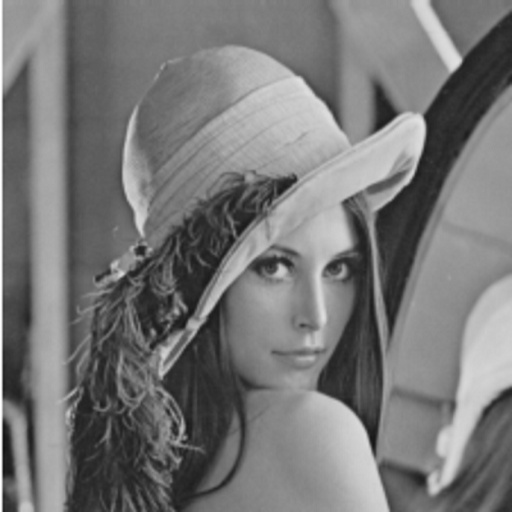

In [124]:

b_array=watermarking(watermark_array,b)
b=INV_DCT(b_array)
print("After applying Inverse dct")
cv2_imshow(b)

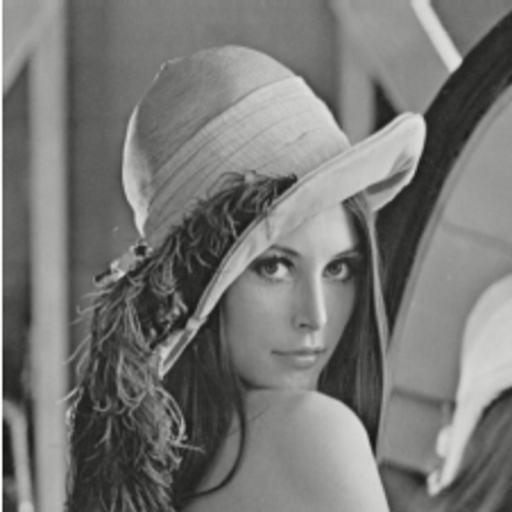

In [125]:
image_wm = np.zeros((512,512,3))
image_wm[:,:,0] = b
image_wm[:,:,1] = ori_array[:,:,1]
image_wm[:,:,2] = ori_array[:,:,2]
cv2_imshow(image_wm)

In [126]:
cv2.imwrite("watermarkedimg.jpg",image_wm)

True

Watermarked image



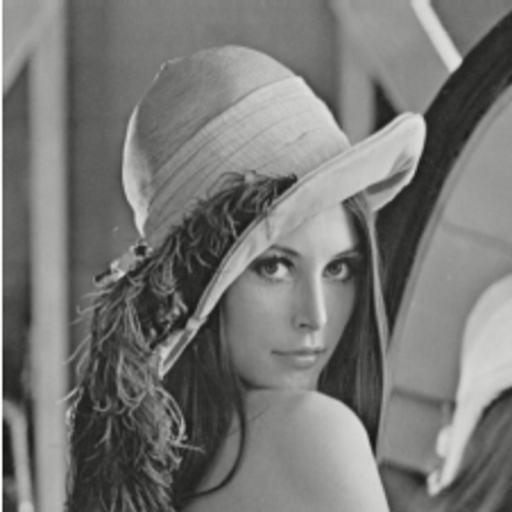

In [127]:
print("Watermarked image\n")
cv2_imshow(image_wm)

In [128]:
def PSNR(original, secretImage): 
    mse = np.mean((secretImage-original) ** 2) 
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    #print(mse)
    psnr = 20 * np.log10(max_pixel/np.sqrt(mse)) 
    return psnr 

In [129]:
PSNR(image_wm, ori_image)

72.50656849226316

In [130]:
key1=int(input("Re-Enter key : "))
while(key1!=key):
    print("ReEnter key : ")
    key1=int(input("Re-Enter key : "))
else:
  print("Success")

Re-Enter key : 1
Success


In [131]:
def get_watermark(dct_watermarked_image, watermark_size):
    subwatermarks = []
    for x in range (0, len(dct_watermarked_image), 8):
        for y in range (0, len(dct_watermarked_image), 8):
            islice = dct_watermarked_image[x:x+8, y:y+8]
            subwatermarks.append(islice[6][6])         
    watermark = np.array(subwatermarks).reshape(watermark_size, watermark_size)*255
    watermark =  np.uint8(watermark)
    return watermark

Recovered watermark Image


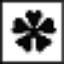

watermark image


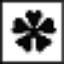

PSNR Value of Recovered watermark image  w.r.t watermark image


100

In [132]:
water_recov=get_watermark(b_array,64)
print("Recovered watermark Image")
cv2_imshow(water_recov)
print("watermark image")
cv2_imshow(watermark)
print("PSNR Value of Recovered watermark image  w.r.t watermark image")
PSNR(watermark,water_recov)

In [133]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.001
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.01
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy
    elif noise_typ == "rotate90" :
        angle = 90
        scale = 1.0
        w = image.shape[1]
        h = image.shape[0]
        rangle = np.deg2rad(angle)  # angle in radians
        nw = (abs(np.sin(rangle) * h) + abs(np.cos(rangle) * w)) * scale
        nh = (abs(np.cos(rangle) * h) + abs(np.sin(rangle) * w)) * scale
        rot_mat = cv2.getRotationMatrix2D((nw * 0.5, nh * 0.5), angle, scale)
        rot_move = np.dot(rot_mat, np.array(
            [(nw - w) * 0.5, (nh - h) * 0.5, 0]))
        rot_mat[0, 2] += rot_move[0]
        rot_mat[1, 2] += rot_move[1]
        noisy=cv2.warpAffine(image, rot_mat, (int(math.ceil(nw)), int(math.ceil(nh))), flags=cv2.INTER_LANCZOS4)
        return noisy
    elif noise_typ=="chop30":
        img = image.copy()
        w, h = img.shape[:2]
        noisy=img[int(w * 0.3):, :]
        return noisy


image with rotate 90 


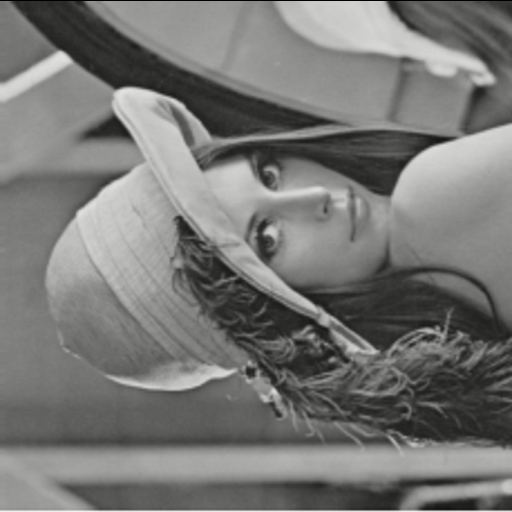

recovered watermark image with noise


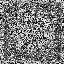

PSNR value noisy watermark image  w.r.t watermark image 


27.98233244582224

In [134]:
noise_img=noisy("rotate90",image_wm)
print("image with rotate 90 ")
cv2_imshow(noise_img)
water_recov=get_watermark(DCT(noise_img[:,:,0]),64)
print("recovered watermark image with noise")
cv2_imshow(water_recov)
print("PSNR value noisy watermark image  w.r.t watermark image ")
PSNR(watermark,water_recov)

image with Pepper and Salt Noise 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


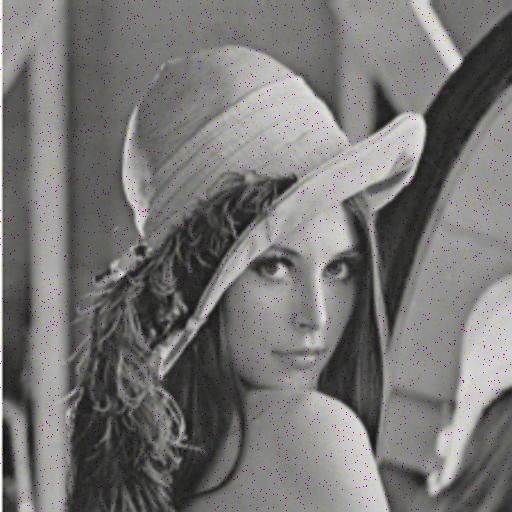

recovered watermark image with noise


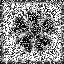

PSNR value noisy watermark image  w.r.t watermark image 


30.16678147046161

In [135]:
noise_img=noisy("s&p",image_wm)
print("image with Pepper and Salt Noise ")
cv2_imshow(noise_img)
water_recov=get_watermark(DCT(noise_img[:,:,0]),64)
print("recovered watermark image with noise")
cv2_imshow(water_recov)
print("PSNR value noisy watermark image  w.r.t watermark image ")
PSNR(watermark,water_recov)

image with Gaussian Noise


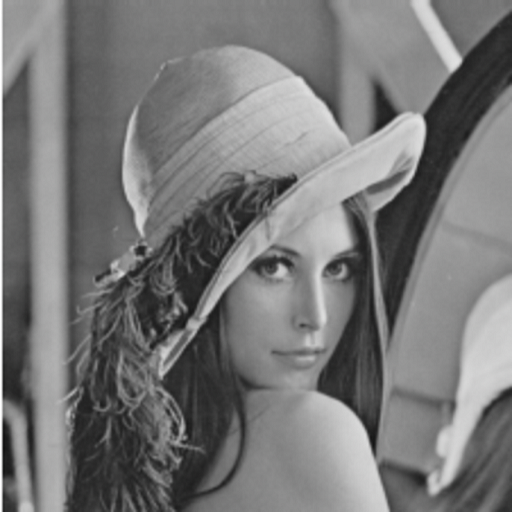

recovered watermark image with noise


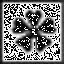

PSNR value noisy watermark image  w.r.t watermark image 


31.251622932758988

In [136]:
noise_img=noisy("gauss",image_wm)
water_recov=get_watermark(DCT(noise_img[:,:,0]),64)
print("image with Gaussian Noise")
cv2_imshow(noise_img)
print("recovered watermark image with noise")
cv2_imshow(water_recov)
print("PSNR value noisy watermark image  w.r.t watermark image ")
PSNR(watermark,water_recov)